In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")

# Display first 5 rows
print(df.head())

# Basic info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Summary after cleaning
print("Shape after removing duplicates:", df.shape)


<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Aditi\AppData\Local\Temp\ipykernel_3256\2646117473.py:4: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")


   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department 

In [5]:
print(df.columns.tolist())

['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Attrition']



Descriptive Stats:
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


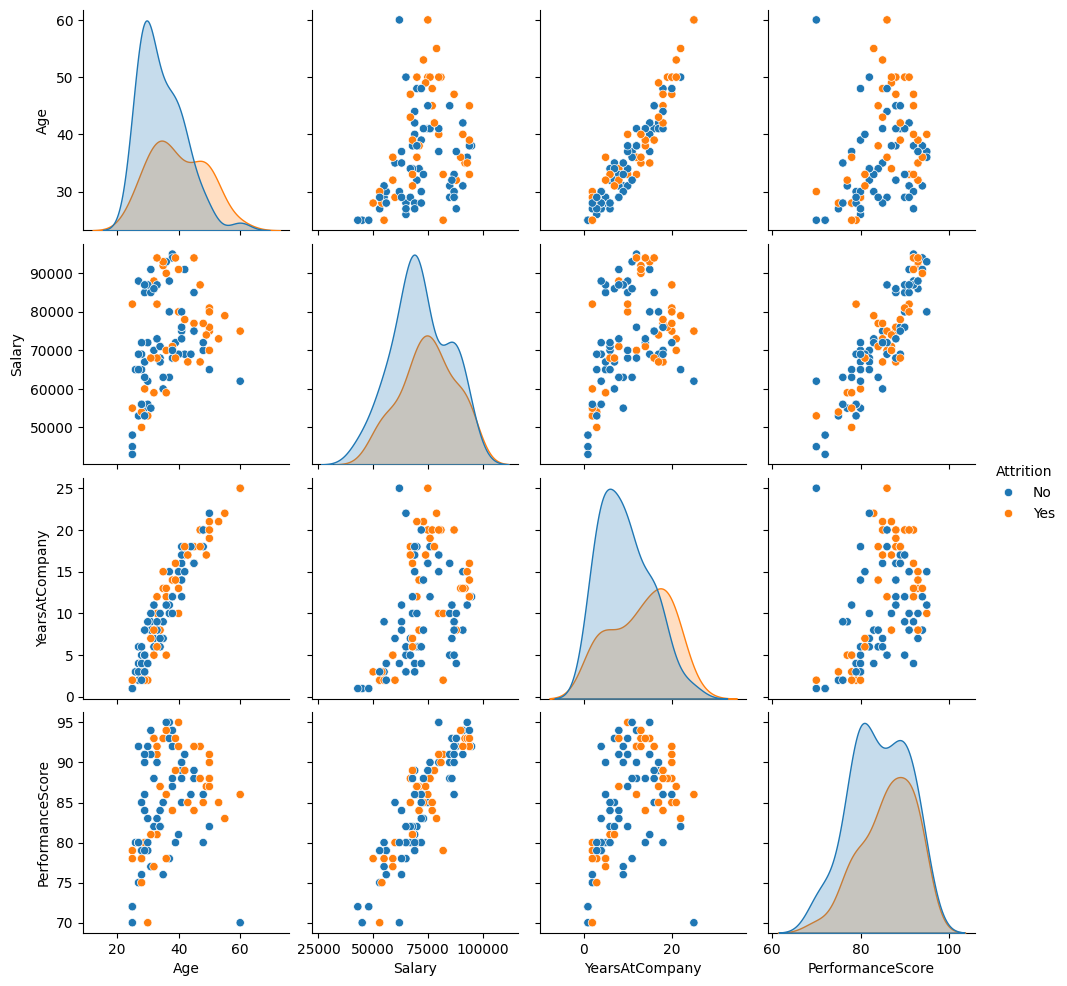

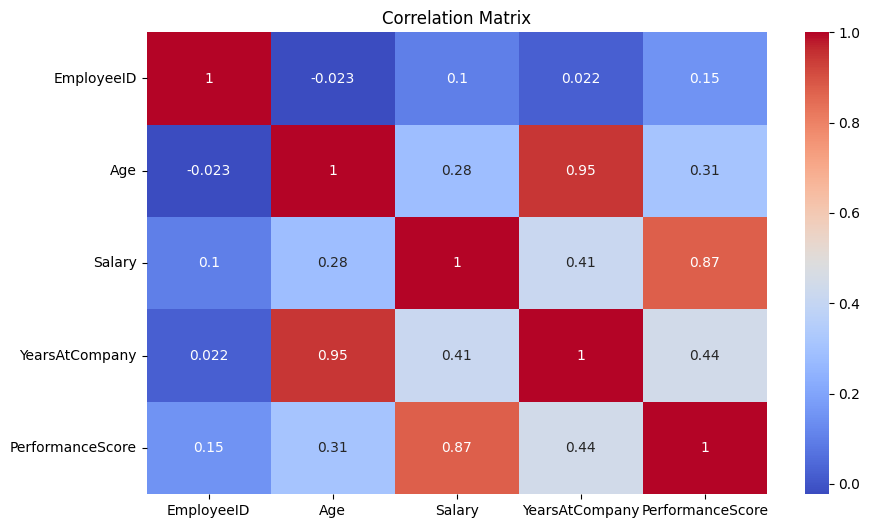

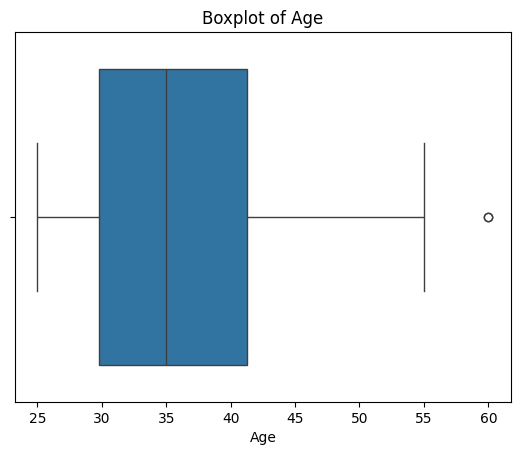

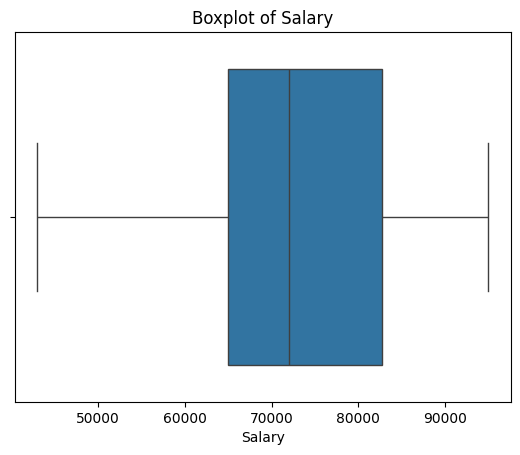

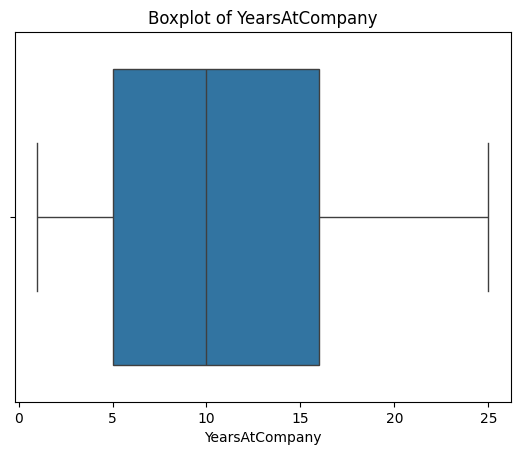

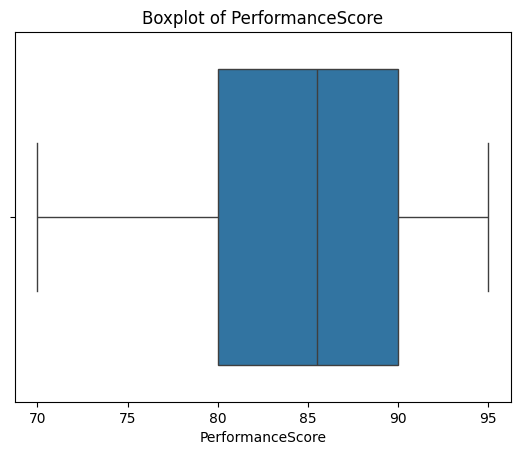

In [7]:
#Descriptive stats & EDA
import seaborn as sns
import matplotlib.pyplot as plt

print("\nDescriptive Stats:")
print(df.describe())

# Pairplot (selected features to avoid overload)
sns.pairplot(df, hue='Attrition', vars=['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplot to detect outliers
numeric_cols = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [21]:
#Probability and Statistical analysis
# Probability of attrition overall
prob_attrition = (df['Attrition'] == 'Yes').mean()
print(f"\nOverall Probability of Attrition: {prob_attrition:.2f}")

# Attrition probability by department
print("\nAttrition Probability by Department:")
attrition_by_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True)
print(attrition_by_dept)

# Automatically create 3 equal-width bins
df['Performance_Level'] = pd.qcut(df['PerformanceScore'], q=3, labels=['Low', 'Average', 'High'])

# Check distribution
print("\nPerformance Level Counts:")
print(df['Performance_Level'].value_counts())


# Attrition probability by performance level
print("\nAttrition Probability by Performance Level:")
attrition_by_perf = df[df['Attrition'] == 'Yes']['Performance_Level'].value_counts(normalize=True)
print(attrition_by_perf)



Overall Probability of Attrition: 0.39

Attrition Probability by Department:
Department
Sales          0.358974
Engineering    0.307692
HR             0.230769
Marketing      0.102564
Name: proportion, dtype: float64

Performance Level Counts:
Performance_Level
Low        37
High       34
Average    29
Name: count, dtype: int64

Attrition Probability by Performance Level:
Performance_Level
High       0.384615
Average    0.358974
Low        0.256410
Name: proportion, dtype: float64


In [23]:
#Bayes theorem for P(Attrition| Performance level=High)
# P(A): probability of attrition
P_A = prob_attrition

# P(B): probability of low performance
P_B = (df['Performance_Level'] == 'High').mean()

# Avoid divide by zero
if P_B == 0:
    print("\nCannot compute Bayes' Theorem because P(Performance = High) is zero.")
else:
    # P(B|A): probability of high performance given attrition
    P_B_given_A = ((df['Attrition'] == 'Yes') & (df['Performance_Level'] == 'High')).sum() / (df['Attrition'] == 'Yes').sum()

    # Bayes' Theorem
    P_A_given_B = (P_B_given_A * P_A) / P_B
    print(f"\nP(Attrition | Performance = High) = {P_A_given_B:.2f}")



P(Attrition | Performance = High) = 0.44


In [24]:
#Hypothesis testing
from scipy.stats import f_oneway

# Extract groups
departments = df['Department'].unique()
groups = [df[df['Department'] == dept]['PerformanceScore'].dropna() for dept in departments]

# ANOVA Test
if len(groups) >= 2 and all(len(g) > 1 for g in groups):
    f_stat, p_val = f_oneway(*groups)
    print(f"\nANOVA Test: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
    if p_val < 0.05:
        print("→ Significant difference in performance scores across departments.")
    else:
        print("→ No significant difference in performance scores across departments.")
else:
    print("Not enough data to perform ANOVA test.")



ANOVA Test: F-statistic = 25.78, p-value = 0.0000
→ Significant difference in performance scores across departments.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")

<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Aditi\AppData\Local\Temp\ipykernel_3256\4038069175.py:11: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")


In [28]:
#Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")

#Feature engineering and Encoding
df_clean = df.copy()
le = LabelEncoder()
df_clean['Attrition'] = le.fit_transform(df_clean['Attrition'])
df_clean['Department'] = le.fit_transform(df_clean['Department'])

scaler = MinMaxScaler()
df_clean[['Salary', 'PerformanceScore']] = scaler.fit_transform(df_clean[['Salary', 'PerformanceScore']])
print(df_clean)

#Attrition prediction model
X_attr = df_clean[['Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore']]
y_attr = df_clean['Attrition']
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(X_attr, y_attr, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_attr, y_train_attr)
y_pred_attr = clf.predict(X_test_attr)

metrics_attr = {
    "Accuracy": accuracy_score(y_test_attr, y_pred_attr),
    "Precision": precision_score(y_test_attr, y_pred_attr),
    "Recall": recall_score(y_test_attr, y_pred_attr),
    "F1-Score": f1_score(y_test_attr, y_pred_attr),
    "Confusion Matrix": confusion_matrix(y_test_attr, y_pred_attr)
}
print(metrics_attr)

#Performance Prediction Model
X_perf = df_clean[['Age', 'Department', 'Salary', 'YearsAtCompany']]
y_perf = df_clean['PerformanceScore']
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train_perf, y_train_perf)
y_pred_perf = reg.predict(X_test_perf)

metrics_perf = {
    "R2 Score": r2_score(y_test_perf, y_pred_perf),
    "MSE": mean_squared_error(y_test_perf, y_pred_perf)
}
print(metrics_perf)


    EmployeeID           Name  Age  Department    Salary  YearsAtCompany  \
0            1       John Doe   29           3  0.230769               3   
1            2     Jane Smith   35           1  0.326923               7   
2            3  Michael Brown   40           0  0.711538              10   
3            4    Emily Davis   28           2  0.423077               5   
4            5  David Johnson   50           3  0.615385              20   
..         ...            ...  ...         ...       ...             ...   
95          96   Daniel Allen   29           1  0.192308               3   
96          97  Thomas Harris   40           0  0.923077              13   
97          98  Michael Lewis   45           3  0.615385              16   
98          99    Linda Young   50           1  0.519231              21   
99         100    John Harris   29           0  0.846154               8   

    PerformanceScore  Attrition  
0               0.40          0  
1               0.6

<>:12: SyntaxWarning: invalid escape sequence '\T'
<>:12: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Aditi\AppData\Local\Temp\ipykernel_3256\3148754869.py:12: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv("C:\TuteDude_assignment\Employee-performance-project\employee_data.csv")


In [ ]:
#DeepLearning for Performance Prediction
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Department'] = LabelEncoder().fit_transform(df['Department'])
X_perf = df[['Age', 'Salary', 'YearsAtCompany', 'Department']]
y_perf = df['PerformanceScore']

scaler = MinMaxScaler()
X_perf_scaled = scaler.fit_transform(X_perf)

X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf_scaled, y_perf, test_size=0.2, random_state=42)

#Build neural network
model_perf = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_perf.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)
])

#Compile and train
model_perf.compile(optimizer='adam', loss='mse')
model_perf.fit(X_train_perf, y_train_perf, epochs=100, batch_size=8, verbose=0)


# Evaluate
y_pred_perf = model_perf.predict(X_test_perf).flatten()
mse = mean_squared_error(y_test_perf, y_pred_perf)
r2 = r2_score(y_test_perf, y_pred_perf)
#DeepLearning for attrition classification
X_attr = df[['Age', 'Salary', 'YearsAtCompany', 'Department', 'PerformanceScore']]
y_attr = df['Attrition']

# Scale features
X_attr_scaled = scaler.fit_transform(X_attr)

# Train-test split
X_train_attr, X_test_attr, y_train_attr, y_test_attr = train_test_split(X_attr_scaled, y_attr, test_size=0.2, random_state=42)

#Build neural network
model_attr = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_attr.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile and train
model_attr.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_attr.fit(X_train_attr, y_train_attr, epochs=100, batch_size=8, verbose=0)

#Evaluate
y_pred_attr_prob = model_attr.predict(X_test_attr).flatten()
y_pred_attr = (y_pred_attr_prob > 0.5).astype(int)
acc = accuracy_score(y_test_attr, y_pred_attr)
prec = precision_score(y_test_attr, y_pred_attr)
rec = recall_score(y_test_attr, y_pred_attr)
f1 = f1_score(y_test_attr, y_pred_attr)

mse, r2, acc, prec, rec, f1

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


(299.34747314453125,
 -4.862661361694336,
 0.5,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857)


Average Performance Score by Department:
 Department
0    91.642857
2    83.200000
3    82.500000
1    81.500000
Name: PerformanceScore, dtype: float64

Attrition Rate by Department:
 Department
0    0.428571
1    0.346154
2    0.200000
3    0.538462
dtype: float64


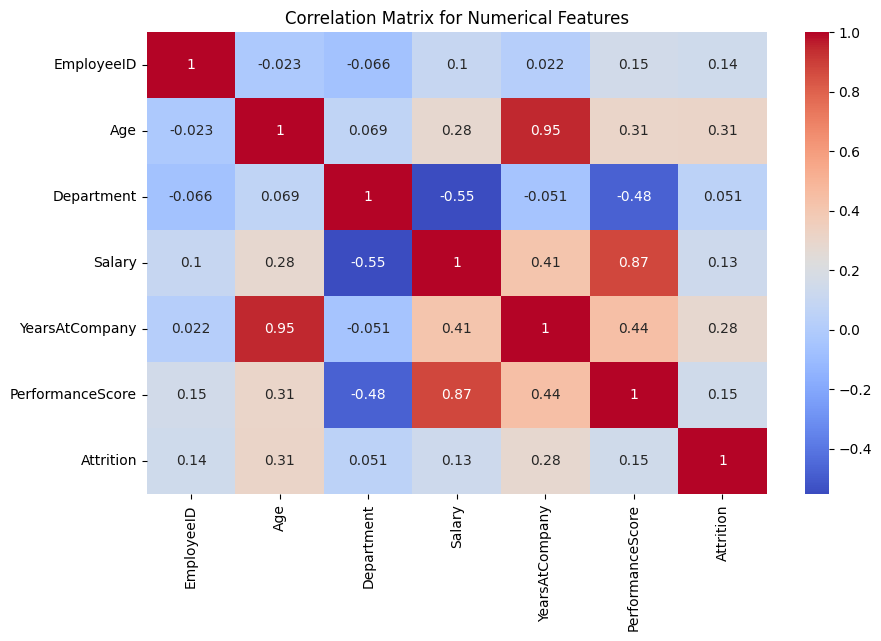

In [30]:
#Insights and recommendations
# Group average performance by department
dept_perf = df.groupby('Department')['PerformanceScore'].mean().sort_values(ascending=False)
print("\nAverage Performance Score by Department:\n", dept_perf)

# Attrition rate by department
attrition_dept = df[df['Attrition'] == 1].groupby('Department').size() / df.groupby('Department').size()
print("\nAttrition Rate by Department:\n", attrition_dept)

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()


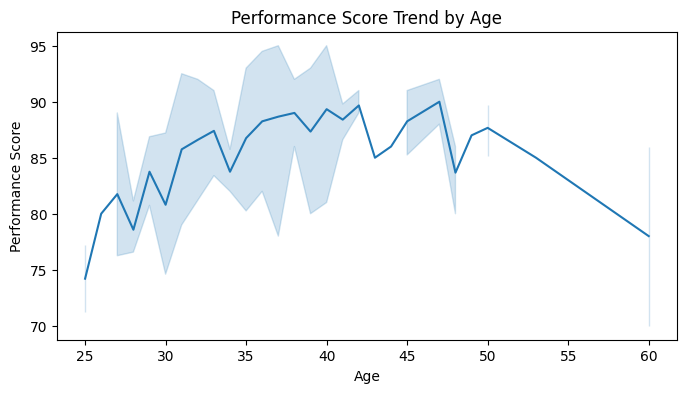

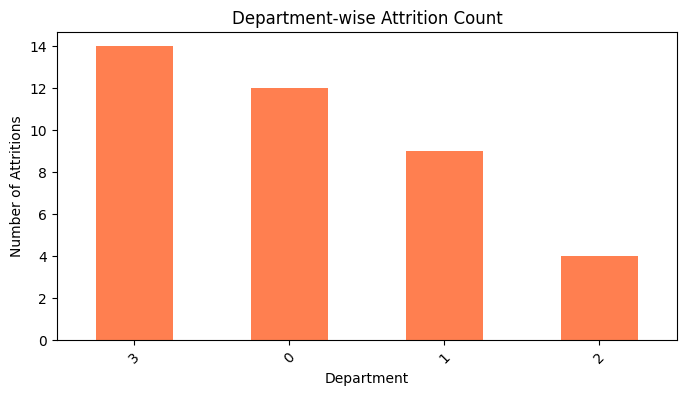

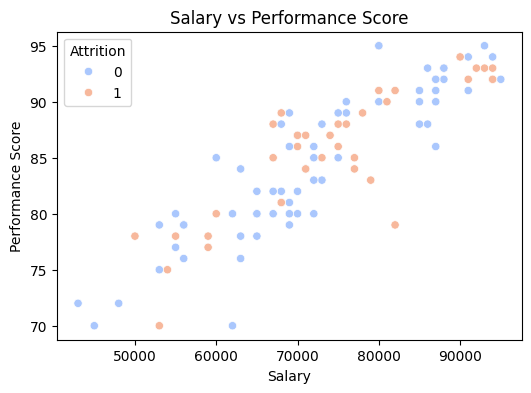

In [31]:
#Data visualization and Reporting
#Line Plots to show performance trends.
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Age', y='PerformanceScore')
plt.title("Performance Score Trend by Age")
plt.xlabel("Age")
plt.ylabel("Performance Score")
plt.show()

#Bar Charts for department-wise attrition.
plt.figure(figsize=(8, 4))
df[df['Attrition'] == 1]['Department'].value_counts().plot(kind='bar', color='coral')
plt.title("Department-wise Attrition Count")
plt.xlabel("Department")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=45)
plt.show()

#Scatter Plots for salary vs. performance.
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Salary', y='PerformanceScore', hue='Attrition', palette='coolwarm')
plt.title("Salary vs Performance Score")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.show()


##Summary of detailed Project Report:

This project aims to analyze employee attrition and performance using both statistical and machine learning techniques. The study utilizes employee demographic and performance data to:

1.Understand key factors behind attrition.
2.Predict future attrition.
3.Evaluate employee performance using regression and deep learning.
4.Recommend strategic HR improvements based on data.

-->Analysis:
It analyzes the following:-
1.Statistics and probability
  (a)Overall attrition rate
  (b)Attrition by department
  (c)Attrition by performance level
  (d)bayes' theorem
  (e)Hypothesis testing:ANOVA

2.Feature engineering
3.Classification
4.Regression

-->It uses deep learning models for:
 a. Performance Prediction (Regression)
 b. Attrition Prediction (Classification)
 
--> 📊Visualizations:To visualize the data it use following plots for different datasets.
   📉 Line Plot: Performance Score Trends Over Time (if temporal data available)

   📊 Bar Chart: Department-wise Attrition Rates

   📈 Scatter Plot: Salary vs. Performance Score

   📉 Confusion Matrix Heatmap

   📈 Predicted vs. Actual Performance (Regression)

-->  📢 Recommendations
1. Performance Improvement Programs:
   -Focus on low-performing employees in HR and Sales.

2. Retention Strategy:
   -Offer incentives to high performers in at-risk departments.

3. Engagement Plans:
   -Launch department-specific engagement initiatives to reduce attrition.

4. Early Intervention:
   -Use model predictions to flag high attrition risk employees for intervention. 


-->  📚Conclusion
     This project successfully applied:
       1. Statistical inference for initial insights.
       2. ML & DL techniques for predictive modeling.
       3. Actionable insights for HR departments to reduce attrition and improve employee performance.

     🎯 Future enhancements may include:
         1. Adding employee satisfaction surveys.
         2. Using NLP on HR feedback.
         3. Time-series models for attrition forecasting.